In [1]:
#CONNEXION à google drive
from google.colab import drive

drive.mount('/Drive')

Mounted at /Drive


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [19]:
#PARAMETERS before launching
#define if we should keep the part "X_test_challenge" from the loaded file or ignore it
Ignore_X_test_challenge = True
Lemmatization = False
FilePathForHD5="/Drive/My Drive/Projet Rakuten/text-dnn-{epoch:02d}-{val_accuracy:.2f}.hdf5"

In [29]:
#CHARGEMENT des fichiers
#dataset_cleaned.csv dot avoir été généré depuis le notebook "cleaning"
import re  
import requests
import io

url = "https://raw.githubusercontent.com/JulienJ-44/rakuteam/main/Datasets/dataset_challenge_cleaned.csv"
download = requests.get(url).content
df=pd.read_csv(io.StringIO(download.decode('utf-8')), index_col=0)
df=df.drop("Unnamed: 0.1", axis=1)
df.head()

,designation,description,productid,prdtypecode
0,olivia personalisiertes notizbuch 150 seiten p...,NaN,3804725264,10.0
1,journal arts numéro 133 28/09/2001 art marche ...,NaN,436067568,2280.0
2,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen marque speedlink stylet ...,201115110,50.0
3,peluche donald europe disneyland 2000 marionne...,NaN,50418756,1280.0
4,guerre tuques,luc idées grandeur veut organiser jeu guerre b...,278535884,2705.0


In [30]:
if (Ignore_X_test_challenge):
    df =df.dropna(subset=['prdtypecode'])
print("Taille du dataframe:",len(df))
#y = pd.read_csv(\"/Drive/My Drive/Colab/Y_train_CVw08PX.csv\", index_col=0) \r\n",
#path = '/Drive/My Drive/Projet Rakuten'
#df = pd.read_csv(f'{path}/dataset_cleaned.csv', index_col=0) 
df = df.replace({'prdtypecode': {10: 1, 2280:2,   50:3, 1280:4, 2705:5, 2522:6, 2582:7, 1560:8, 1281:9, 1920:10, 2403:11,
       1140:12, 2583:13, 1180:14, 1300:15, 2462:16, 1160:17, 2060:18,   40:19,   60:20, 1320:21, 1302:22,
       2220:23, 2905:24, 2585:25, 1940:26, 1301:0}})
#valeurs MANQUANTES
df['description']=df['description'].fillna("")
df['designation']=df['designation'].fillna("")
df['description']=df['description'].replace({'n°': 'numéro '}, regex=True)
df['designation']=df['designation'].replace({'n°': 'numéro '}, regex=True)
df['description']=df['description'].replace({"'": ' '}, regex=True)
df['designation']=df['designation'].replace({"'": ' '}, regex=True)
#classes_codes = (y['prdtypecode'].value_counts().index.tolist())
df.head()

Taille du dataframe: 84916


,designation,description,productid,prdtypecode
0,olivia personalisiertes notizbuch 150 seiten p...,,3804725264,1.0
1,journal arts numéro 133 28/09/2001 art marche ...,,436067568,2.0
2,grand stylet ergonomique bleu gamepad nintendo...,pilot style touch pen marque speedlink stylet ...,201115110,3.0
3,peluche donald europe disneyland 2000 marionne...,,50418756,4.0
4,guerre tuques,luc idées grandeur veut organiser jeu guerre b...,278535884,5.0


In [31]:
#on concatène les 2 champs texte

from sklearn.model_selection import train_test_split
#création dataset train / test 
df['sentences'] = df['designation'] + " " + df['description']

#classes_codes = (y['prdtypecode'].value_counts().index.tolist())


In [32]:
index=1
print(df['designation'][index])
print(df['description'][index])
print(df['sentences'][index])

journal arts numéro 133 28/09/2001 art marche salon art asiatique paris jacques barrere francois perrier reforme ventes encheres publiques sna fete cent ans

journal arts numéro 133 28/09/2001 art marche salon art asiatique paris jacques barrere francois perrier reforme ventes encheres publiques sna fete cent ans 


In [ ]:
if Lemmatization:
  pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git

  Cloning https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git to /tmp/pip-req-build-s4fx869y
  Running command git clone -q https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git /tmp/pip-req-build-s4fx869y
  Created wheel for FrenchLefffLemmatizer: filename=FrenchLefffLemmatizer-0.3-cp37-none-any.whl size=3533520 sha256=cbbb48a73856625a348b20984a26e8ca63b0fc5f92adf6d1d68d6c68a4a42e58
  Stored in directory: /tmp/pip-ephem-wheel-cache-_3uoz758/wheels/95/b7/c0/e249ca2690c04f6106b9581c5e4111287f71dbd85bac903445
Successfully built FrenchLefffLemmatizer


In [ ]:
#LEMMATIZATION (OPTIONNAL!! => -1% accuracy)
def lemmatization(texte):
    """
    Fonction pour transformer un texte en une suite de mots séparés par des espaces
    et en excluant les stopwords et les mots de moins de 2 caractères
    """
    mots = word_tokenize(texte, language='french')
    tokens = []
    for mot in mots:
      if (len(mot)>1):
        tokens.append(lemmatizer.lemmatize(mot))
    return tokens

if Lemmatization:
  print("3 premiers articles avant lemmatization")
  print(sentences[0])
  print(sentences[1])
  print(sentences[2])
  print(sentences[3])

  from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
  lemmatizer = FrenchLefffLemmatizer()
  #https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer

  from nltk.tokenize import word_tokenize
  import nltk as nltk
  nltk.download('punkt') #télécharge les paquets language (dont FR)
  
  sentences= sentences.apply(lambda x: lemmatization(str(x)))
  print("3 premiers articles APRES lemmatization")
  print(sentences[0])
  print(sentences[1])
  print(sentences[2])
  print(sentences[3])

3 premiers articles avant lemmatization
olivia personalisiertes notizbuch 150 seiten punktraster ca din a5 rosen-design 
journal arts numéro  133 28/09/2001 l art marche salon d art asiatique paris jacques barrere francois perrier reforme ventes encheres publiques sna fete cent ans 
grand stylet ergonomique bleu gamepad nintendo wii speedlink pilot style pilot style touch pen marque speedlink stylet ergonomique gamepad nintendo wii u. confort optimal précision maximale gamepad wii grand stylet hautement ergonomique seulement parfaitement adapté main aussi très élégant livré support fixe sans adhésif l arrière gamepad caractéristiques modèle speedlink pilot style touch pen couleur bleu ref fabricant sl-3468-be compatibilité gamepad nintendo wii forme particulièrement ergonomique excellente tenue main pointe revêtement longue durée conçue abîmer l écran tactile bonus support inclu gamepad
peluche donald europe disneyland 2000 marionnette doigt 
[nltk_data] Downloading package punkt to /r

In [33]:
import numpy as np

if (Ignore_X_test_challenge):
  y = df['prdtypecode'].values
  sentences_train, sentences_test, y_train, y_test = train_test_split(
        df['sentences'], y, test_size=0.2, random_state=123)
else:
  df_train = df.dropna(subset=["prdtypecode"], axis=0)
  df_test = df[np.isnan(df["prdtypecode"])]
  y_train = df_train['prdtypecode'].values
  y_test = None
  sentences_train = df_train['sentences']
  sentences_test = df_test['sentences']

print("sentences train:", len(sentences_train))
print("sentences test:", len(sentences_test)) 

sentences train: 67932
sentences test: 16984


In [34]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, dtype = 'int') # Veiller à n'exécuter cette instruction qu'une seule fois
if (not (y_test is None)):
  y_test = np_utils.to_categorical(y_test, dtype = 'int')   # Veiller à n'exécuter cette instruction qu'une seule fois

In [35]:
#Création du vocabulaire
#Tokenization de X_train / X_test et transformation en séquences de mots du vocabulaire
#   Vocabulary(Keys only) dans tokenizer : ["'", "'cm'", "'couleur'", "'taille'", "'piscine'", "'plus'", "'peut'", "'haute'", "'qualité'", "'être'", "'1", "'dimensions'", ...
#   Article(texte + description) dans sentences_test/sentences_train: ['jeu', 'chaise', 'longue', 'pcs', 'textilène', 'noir', 'noir']
#   Représentation de l'article dans X_test/X_train: [21, 288, 435, 494, 5449, 96, 96]

#Note: Pay close attention to the difference between this technique and the X_train that was produced by scikit-learn’s CountVectorizer.
#With CountVectorizer, we had stacked vectors of word counts, and each vector was the same length (the size of the total corpus vocabulary). 
#With Tokenizer, the resulting vectors equal the length of each text, and the numbers don’t denote counts
#   , but rather correspond to the word values from the dictionary tokenizer.word_index.
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=20000)#default was 10000/best 20000
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(sentences_train.shape)
print(len(X_train))


(67932,)
67932


In [ ]:
#LONG !!! (optionnal)
#print(f'Vocab : {list(tokenizer.word_index.keys())}')

In [12]:
tokenizer.word_index["numéro"]

63

In [36]:
#On complète chaque représentation d'article sous la forme [21, 288, 435, 494, 5449, 96, 96] en [21, 288, 435, 494, 5449, 96, 96, 0, 0, 0, ...]
#pour conserver des tailles de phrases similaires
from keras.preprocessing.sequence import pad_sequences
maxlen = 400#defautl was 250, best 400
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print("X_train", len(X_train))
print("X_test", len(X_test))

X_train 67932
X_test 16984


In [39]:
#DNN1
from keras.models import Sequential
from keras import layers
import keras
from time import time
# First, create an instance of this ReduceLROnPlateau class
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
# autosave best Model
best_model_file = FilePathForHD5
best_model = ModelCheckpoint(best_model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.0001)

t0 = time()
embedding_dim = 48#BEST 100
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
#model.add(layers.GlobalMaxPooling1D())
#model.add(Dropout(0.25))
model.add(layers.Flatten())
#model.add(layers.Dropout(0.25))
#model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(48, activation='relu'))#BEST 100
model.add(layers.Dropout(0.5)) #78.5 sans Dropout; 78.8 avec 0.25; 79.0 avec 0.5;
model.add(layers.Dense(27, activation='softmax'))
# last_layer = Dense(units = 27,
#                      kernel_initializer ='normal',
#                      activation ='softmax')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), #0.001
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
if (Ignore_X_test_challenge):
  history = model.fit(x=X_train, y=y_train,
                    epochs=8,#5
                    callbacks=[best_model],#reduce_lr, 
                    batch_size=200,
                    validation_data=(X_test, y_test))
else:
  history = model.fit(X_train, y_train,
                    epochs=5,#5
                    batch_size=200)
  

print('Time for DNN1: {} mins'.format(round((time() - t0) / 60, 2)))

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 400, 48)           7593312   
_________________________________________________________________
flatten_8 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 48)                921648    
_________________________________________________________________
dropout_8 (Dropout)          (None, 48)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 27)                1323      
Total params: 8,516,283
Trainable params: 8,516,283
Non-trainable params: 0
_________________________________________________________________
Epoch 1/8
340/340 [==============================] - 42s 122ms/step - loss: 2.2216 - accuracy: 0.3580 - val_lo

Training Accuracy: 0.9738
Testing Accuracy:  0.8227


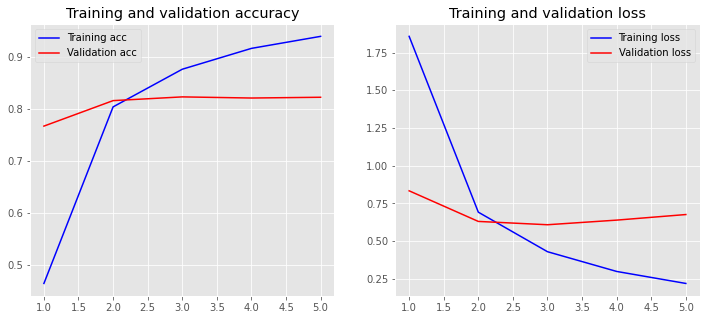

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
y_pred=model.predict(X_test)
ypred_proba=model.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
df_tosave=pd.DataFrame(ypred_proba)
path = '/Drive/My Drive/Projet Rakuten'
df_tosave.to_csv(f'{path}/ypred_proba_DnnText_score0_82.csv')

In [ ]:
#CNN
from time import time

t0 = time()
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 3, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    #verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=200)

print('Time for CNN: {} mins'.format(round((time() - t0) / 60, 2)))

In [ ]:
#RNN
from time import time

t0 = time()
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Bidirectional(layers.LSTM(64)))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    #verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=200)

print('Time for RNN: {} mins'.format(round((time() - t0) / 60, 2)))